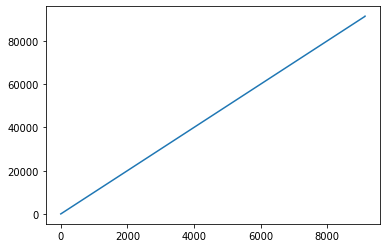

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def parse_if_number(s):
    try: return float(s)
    except: return True if s=="true" else False if s=="false" else s if s else None

def parse_ndarray(s):
    return np.fromstring(s, sep=' ') if s else None

test = pd.read_csv('test.csv', converters={
    'vectime': parse_ndarray,
    'vecvalue':parse_ndarray},
                  usecols=['run','type','module','name','vectime','vecvalue'])

test.tail()

tmp = test[['run', 'vecvalue']]
tmp.tail()

test.module.unique()

tmp = test[(test.type == 'vector') & (test.module=='CompleteNetwork7.node_1')]
tmp.head()

test = test.assign(qname = test.module + "." + test.name)
test[test.type=='vector'].head()

vector = test[test.type =='vector']
len(vector)

vector.name.unique(), vector.module.unique()
vector.head()

somevectors = vector[vector.name == "msg_Sent"][:1]
for row in somevectors.itertuples():
    plt.plot(row.vectime, row.vecvalue, drawstyle='steps-post')
#plt.legend(somevectors.module)
plt.show()

# vec = vector[vector.name == 'Msg_Sent'].iloc[4]
# plt.plot(vec.vectime, vec.vecvalue, drawstyle='steps-post')
# plt.xlim(0,)
# plt.show()
